In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
pirange_1 = pd.read_csv('PIRange_1')
rosetta_mean_1 = pd.read_csv('rosetta_mean_1')
soilmaps_mean_1 = pd.read_csv('soilmaps_mean_1')
textural_classes_1 = pd.read_csv('textural_classes_1')
db = pd.read_csv('New_DB_2.csv')

In [153]:
"""db = pd.read_csv('New_DB_2.csv')
db.drop_duplicates(subset=['Latitud', 'Longitud', 'Fecha Evento'])
db = db[db['Valor']==1]"""


"db = pd.read_csv('New_DB_2.csv')\ndb.drop_duplicates(subset=['Latitud', 'Longitud', 'Fecha Evento'])\ndb = db[db['Valor']==1]"

In [154]:
textural_classes_1 = textural_classes_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
rosetta_mean_1 = rosetta_mean_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
soilmaps_mean_1 = soilmaps_mean_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
pirange_1 = pirange_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [155]:
cols_latlon = ['Latitud', 'Longitud']
rosetta_mean_1 = rosetta_mean_1.drop(columns=cols_latlon)
pirange_1 = pirange_1.drop(columns=cols_latlon)
textural_classes_1 = textural_classes_1.drop(columns=cols_latlon)

In [156]:
data_0 = pd.read_csv('tif_data_0_01')
data_0['Valor'] = 0
data_1 = pd.concat([soilmaps_mean_1, rosetta_mean_1, pirange_1, textural_classes_1], axis=1)
data_1['Valor'] = 1

In [157]:
data_0 = pd.read_csv('tif_data_0_01')
data_0['Valor'] = 0
data_1 = pd.concat([soilmaps_mean_1, rosetta_mean_1, pirange_1, textural_classes_1], axis=1)
data_1['Valor'] = 1

In [158]:
data_0 = data_0.drop(columns=['Unnamed: 0'])

In [159]:
print(f'Luego de drop duplicates: {data_0.shape}\n')
data_0 = data_0.drop_duplicates()
print(f'Luego de drop duplicates: {data_0.shape}')

Luego de drop duplicates: (1247, 143)

Luego de drop duplicates: (1132, 143)


In [160]:
print(f'Luego de drop duplicates: {data_1.shape}\n')
data_1 = data_1.drop_duplicates()
print(f'Luego de drop duplicates: {data_1.shape}')

Luego de drop duplicates: (458, 106)

Luego de drop duplicates: (420, 106)


In [161]:
db_1 = db[db['Valor'] == 1]
db_0 = db[db['Valor'] == 0]
db_0.shape

(533, 17)

In [162]:
data_0 = pd.merge(data_0, db_0, on=['Latitud', 'Longitud', 'Valor', 'Fecha Evento'], how='inner')
data_1 = pd.merge(data_1, db_1, on=['Latitud', 'Longitud', 'Valor'], how='inner')

In [163]:
len(data_0.columns), len(data_1.columns)

(156, 120)

In [164]:
def rename_columns(df):
    # Crear una lista con los nombres de las columnas renombradas
    new_columns = []
    for col in df.columns:
        if col.endswith('_x') or col.endswith('_y'):
            new_columns.append(col[:-2])
        else:
            new_columns.append(col)
    
    # Renombrar las columnas del DataFrame
    df.columns = new_columns

    return df

In [165]:
data_0 = rename_columns(data_0)
data_1 = rename_columns(data_1)
print(data_0.shape)

(1001, 156)


In [166]:
db

,Región,Comuna,Factor desencadenante,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m),PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4,Fecha Evento,Tipo Remoción en masa,Unnamed: 0,Valor,slope
0,Los Lagos,Castro,Precipitaciones,-73.7855,-42.4686,WGS 84- UTM 18 S,-,11.358299,0.460907,0.417099,0.387939,0.410934,07/03/2001,Flujo,0.0,1.0,37.616885
1,Los Lagos,Castro,Precipitaciones,-73.7855,-42.4686,WGS 84- UTM 18 S,-,282.989359,0.467758,0.467758,0.466522,0.425278,09/03/2001,Flujo,1.0,1.0,37.616885
2,Los Lagos,Chaitén,Precipitaciones,-72.6983,-42.4087,WGS 84- UTM 18 S,-,83.771901,0.436966,0.437408,0.438400,0.438980,03/05/2002,Deslizamiento,2.0,1.0,58.718334
3,Los Lagos,Río Negro,Precipitaciones,-73.7889,-40.7083,WGS 84- UTM 18 S,6,101.366892,0.515045,0.513718,0.519211,0.517426,09/08/2002,Deslizamiento,3.0,1.0,40.098548
4,Los Lagos,Osorno,Precipitaciones,-73.6047,-40.5750,WGS 84- UTM 18 S,126,0.000000,0.478531,0.480499,0.477859,0.500580,22/08/2007,Deslizamiento,4.0,1.0,42.977906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,Biobío,Chiguayante,Precipitaciones,-73.0067,-36.9095,WGS 84/ UTM 18 S,57,3.830269,0.471466,0.471237,0.468872,0.434387,09/07/2006,Flujo,2485.0,0.0,48.232759
1062,Biobío,Tomé,Precipitaciones,-72.9681,-36.5832,WGS 84/ UTM 18 S,40,6.876428,NaN,NaN,NaN,NaN,09/07/2006,Deslizamiento,2486.0,0.0,36.674431
1063,Biobío,Chiguayante,Precipitaciones,-73.0030,-36.9147,WGS 84/ UTM 18 S,50,327.677736,0.471588,0.469116,0.470917,0.454514,11/07/2006,Deslizamiento,2487.0,0.0,48.232759
1064,Biobío,Chiguayante,Precipitaciones,-73.0067,-36.9095,WGS 84/ UTM 18 S,57,327.677736,0.471588,0.469116,0.470917,0.454514,11/07/2006,Flujo,2488.0,0.0,48.232759


In [167]:
data_1 = data_1.drop_duplicates()
data_0 = data_0.drop_duplicates(subset=['Latitud', 'Longitud', 'Fecha Evento'])
print(data_0.shape, data_1.shape)

(531, 156) (458, 120)


In [168]:
def getDuplicateColumns(df):
 
    # Create an empty set
    duplicateColumnNames = set()
 
    # Iterate through all the columns of dataframe
    for x in range(df.shape[1]):
 
        # Take column at xth index.
        col = df.iloc[:, x]
 
        # Iterate through all the columns
        for y in range(x + 1, df.shape[1]):
 
            # Take column at yth index.
            otherCol = df.iloc[:, y]
 
            # Check if two columns at x & y
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [169]:
columns_data_0 = set(data_0.columns)
columns_data_1 = set(data_1.columns)

# Columnas en común
common_columns = columns_data_0 & columns_data_1

print("Columnas en común:", list(common_columns))

Columnas en común: ['valor_humedad_suelo1', 'Valor', 'AWC_30-60cm.tif', 'theta_s_15-30cm.tif', 'Clay.100-200cm.tif', 'FC.100-200cm.tif', 'Tex_Class.30-60cm.tif', 'AvMoist.100-200cm.tif', 'FC.15-30cm.tif', 'ksat_30-60cm.tif', 'valor_humedad_suelo3', 'n_0-5cm.tif', 'FC.0-5cm.tif', 'PIRange_Clay.30-60cm.tif', 'PIRange_Bulkd.0-5cm.tif', 'PIRange_Bulkd.30-60cm.tif', 'AvMoist.0-5cm.tif', 'slope', 'Sand.0-5cm.tif', 'Silt.100-200cm.tif', 'Factor desencadenante', 'theta_s_60-100cm.tif', 'Clay.15-30cm.tif', 'Tex_Class.60-100cm.tif', 'AWC_0-5cm.tif', 'ksat_5-15cm.tif', 'FC.5-15cm.tif', 'PIRange_Clay.0-5cm.tif', 'theta_s_100-200cm.tif', 'Tipo Remoción en masa', 'Bulkd.5-15cm.tif', 'Clay.0-5cm.tif', 'PIRange_Bulkd.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif', 'valor_humedad_suelo4', 'ksat_15-30cm.tif', 'PIRange_Clay.5-15cm.tif', 'PIRange_Clay.100-200cm.tif', 'Cota (m.s.n.m)', 'Silt.5-15cm.tif', 'Clay.60-100cm.tif', 'PWP.30-60cm.tif', 'Bulkd.30-60cm.tif', 'ksat_0-5cm.tif', 'Comuna', 'theta_r_0-5cm.tif

In [170]:
cols = ['Latitud', 'Longitud', 'Fecha Evento','PP',  'slope', 'valor_humedad_suelo1', 'Valor']
data_1_aux = data_1[cols]
data_0_aux = data_0[cols]
print(data_0_aux.shape, data_1_aux.shape)

(531, 7) (458, 7)


In [171]:
data_1['alpha_100-200cm.tif'].isna().sum()

108

In [172]:
data_0_filtered = data_0.filter(regex='(_100-200cm.tif$|\\.100-200cm.tif$)')
data_1_filtered = data_1.filter(regex='(_100-200cm.tif$|\\.100-200cm.tif$)')
print(data_0_filtered.shape, data_1_filtered.shape)

(531, 22) (458, 17)


In [173]:
def count_nan_per_column(df):
    for column in df.columns:
        nan_count = df[column].isna().sum()
        print(f'NaN en la columna {column}: {nan_count}')

In [174]:
columns_data_0 = set(data_0_filtered.columns)
columns_data_1 = set(data_1_filtered.columns)

# Columnas que están en data_0 pero no en data_1
columns_only_in_data_0 = columns_data_0 - columns_data_1
# Columnas que están en data_1 pero no en data_0
columns_only_in_data_1 = columns_data_1 - columns_data_0

print("Columnas en data_0 pero no en data_1:", columns_only_in_data_0)
print("Columnas en data_1 pero no en data_0:", columns_only_in_data_1)

Columnas en data_0 pero no en data_1: {'theta_r.100-200cm.tif', 'ksat.100-200cm.tif', 'alpha.100-200cm.tif', 'theta_s.100-200cm.tif', 'n.100-200cm.tif'}
Columnas en data_1 pero no en data_0: set()


In [175]:
drop_cols = ['theta_s.100-200cm.tif', 'n.100-200cm.tif', 'theta_r.100-200cm.tif', 'alpha.100-200cm.tif', 'ksat.100-200cm.tif']
data_0_filtered = data_0_filtered.drop(columns=drop_cols)

In [176]:
columns_data_0 = set(data_0_filtered.columns)
columns_data_1 = set(data_1_filtered.columns)

# Columnas que están en data_0 pero no en data_1
columns_only_in_data_0 = columns_data_0 - columns_data_1
# Columnas que están en data_1 pero no en data_0
columns_only_in_data_1 = columns_data_1 - columns_data_0

print("Columnas en data_0 pero no en data_1:", columns_only_in_data_0)
print("Columnas en data_1 pero no en data_0:", columns_only_in_data_1)

Columnas en data_0 pero no en data_1: set()
Columnas en data_1 pero no en data_0: set()


In [177]:
data_0_final = pd.concat([data_0_aux, data_0_filtered], axis=1)
data_1_final = pd.concat([data_1_aux, data_1_filtered], axis=1)


In [178]:
data_0_final.shape, data_1_final.shape

((531, 24), (458, 24))

In [179]:
db_1

,Región,Comuna,Factor desencadenante,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m),PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4,Fecha Evento,Tipo Remoción en masa,Unnamed: 0,Valor,slope
0,Los Lagos,Castro,Precipitaciones,-73.7855,-42.4686,WGS 84- UTM 18 S,-,11.358299,0.460907,0.417099,0.387939,0.410934,07/03/2001,Flujo,0.0,1.0,37.616885
1,Los Lagos,Castro,Precipitaciones,-73.7855,-42.4686,WGS 84- UTM 18 S,-,282.989359,0.467758,0.467758,0.466522,0.425278,09/03/2001,Flujo,1.0,1.0,37.616885
2,Los Lagos,Chaitén,Precipitaciones,-72.6983,-42.4087,WGS 84- UTM 18 S,-,83.771901,0.436966,0.437408,0.438400,0.438980,03/05/2002,Deslizamiento,2.0,1.0,58.718334
3,Los Lagos,Río Negro,Precipitaciones,-73.7889,-40.7083,WGS 84- UTM 18 S,6,101.366892,0.515045,0.513718,0.519211,0.517426,09/08/2002,Deslizamiento,3.0,1.0,40.098548
4,Los Lagos,Osorno,Precipitaciones,-73.6047,-40.5750,WGS 84- UTM 18 S,126,0.000000,0.478531,0.480499,0.477859,0.500580,22/08/2007,Deslizamiento,4.0,1.0,42.977906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Biobío,Chiguayante,Precipitaciones,-73.0167,-36.9195,WGS 84/ UTM 18 S,57,3.830269,0.471466,0.471237,0.468872,0.434387,09/07/2006,Flujo,1238.0,1.0,48.232759
529,Biobío,Tomé,Precipitaciones,-72.9781,-36.5932,WGS 84/ UTM 18 S,40,6.876428,NaN,NaN,NaN,NaN,09/07/2006,Deslizamiento,1239.0,1.0,36.674431
530,Biobío,Chiguayante,Precipitaciones,-73.0130,-36.9247,WGS 84/ UTM 18 S,50,328.705409,0.519699,0.518951,0.518845,0.519943,11/07/2006,Deslizamiento,1240.0,1.0,48.232759
531,Biobío,Chiguayante,Precipitaciones,-73.0167,-36.9195,WGS 84/ UTM 18 S,57,327.677736,0.471588,0.469116,0.470917,0.454514,11/07/2006,Flujo,1241.0,1.0,48.232759


In [180]:
db_0

,Región,Comuna,Factor desencadenante,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m),PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4,Fecha Evento,Tipo Remoción en masa,Unnamed: 0,Valor,slope
533,Los Lagos,Castro,Precipitaciones,-73.7755,-42.4586,WGS 84- UTM 18 S,-,11.358299,0.460907,0.417099,0.387939,0.410934,07/03/2001,Flujo,1247.0,0.0,37.616885
534,Los Lagos,Castro,Precipitaciones,-73.7755,-42.4586,WGS 84- UTM 18 S,-,282.989359,0.467758,0.467758,0.466522,0.425278,09/03/2001,Flujo,1248.0,0.0,37.616885
535,Los Lagos,Chaitén,Precipitaciones,-72.6883,-42.3987,WGS 84- UTM 18 S,-,88.743122,0.436966,0.437408,0.438400,0.438980,03/05/2002,Deslizamiento,1249.0,0.0,57.405164
536,Los Lagos,Río Negro,Precipitaciones,-73.7789,-40.6983,WGS 84- UTM 18 S,6,101.366892,0.515045,0.513718,0.519211,0.517426,09/08/2002,Deslizamiento,1250.0,0.0,37.844912
537,Los Lagos,Osorno,Precipitaciones,-73.5947,-40.5650,WGS 84- UTM 18 S,126,0.000000,0.478531,0.480499,0.477859,0.500580,22/08/2007,Deslizamiento,1251.0,0.0,42.977906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,Biobío,Chiguayante,Precipitaciones,-73.0067,-36.9095,WGS 84/ UTM 18 S,57,3.830269,0.471466,0.471237,0.468872,0.434387,09/07/2006,Flujo,2485.0,0.0,48.232759
1062,Biobío,Tomé,Precipitaciones,-72.9681,-36.5832,WGS 84/ UTM 18 S,40,6.876428,NaN,NaN,NaN,NaN,09/07/2006,Deslizamiento,2486.0,0.0,36.674431
1063,Biobío,Chiguayante,Precipitaciones,-73.0030,-36.9147,WGS 84/ UTM 18 S,50,327.677736,0.471588,0.469116,0.470917,0.454514,11/07/2006,Deslizamiento,2487.0,0.0,48.232759
1064,Biobío,Chiguayante,Precipitaciones,-73.0067,-36.9095,WGS 84/ UTM 18 S,57,327.677736,0.471588,0.469116,0.470917,0.454514,11/07/2006,Flujo,2488.0,0.0,48.232759


In [181]:
cols = ['Latitud', 'Longitud', 'Fecha Evento',] #'Tex_Class.100-200cm.tif','n_100-200cm.tif',
       # 'theta_r_100-200cm.tif', 'theta_s_100-200cm.tif']
data_0_final = data_0_final.drop(columns=cols)
data_1_final = data_1_final.drop(columns=cols)

In [182]:
data_final = pd.concat([data_0_final, data_1_final])

In [183]:
data_final = data_final.fillna(data_final.mean())

In [184]:
data_final.columns

Index(['PP', 'slope', 'valor_humedad_suelo1', 'Valor',
       'PIRange_Bulkd.100-200cm.tif', 'PIRange_Clay.100-200cm.tif',
       'PIRange_Sand.100-200cm.tif', 'alpha_100-200cm.tif',
       'AvMoist.100-200cm.tif', 'AWC_100-200cm.tif', 'FC.100-200cm.tif',
       'ksat_100-200cm.tif', 'n_100-200cm.tif', 'PWP.100-200cm.tif',
       'theta_r_100-200cm.tif', 'theta_s_100-200cm.tif', 'Bulkd.100-200cm.tif',
       'Clay.100-200cm.tif', 'Sand.100-200cm.tif', 'Silt.100-200cm.tif',
       'Tex_Class.100-200cm.tif'],
      dtype='object')

In [185]:
data_y = data_final['Valor']
data = data_final.drop(columns=['Valor'])

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
}

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2)
print(f'Numero de entrenamiendo: {X_train.shape}, Numero de test: {X_test.shape}')
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precisión de {acc*100}')

Numero de entrenamiendo: (791, 20), Numero de test: (198, 20)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión de 73.23232323232324


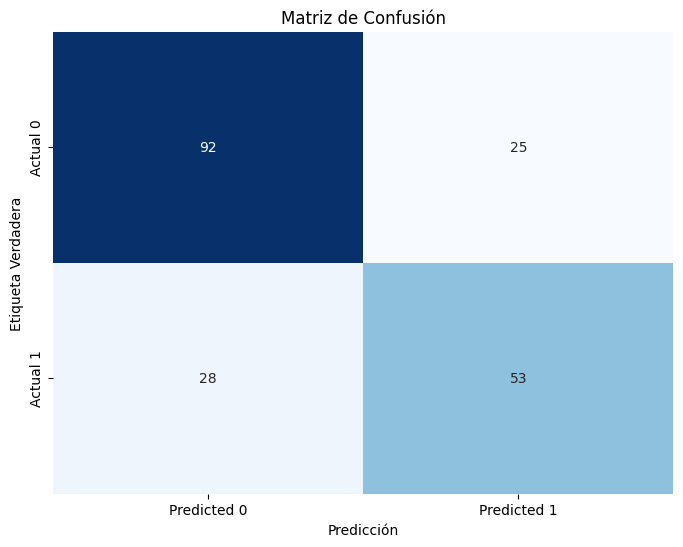

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

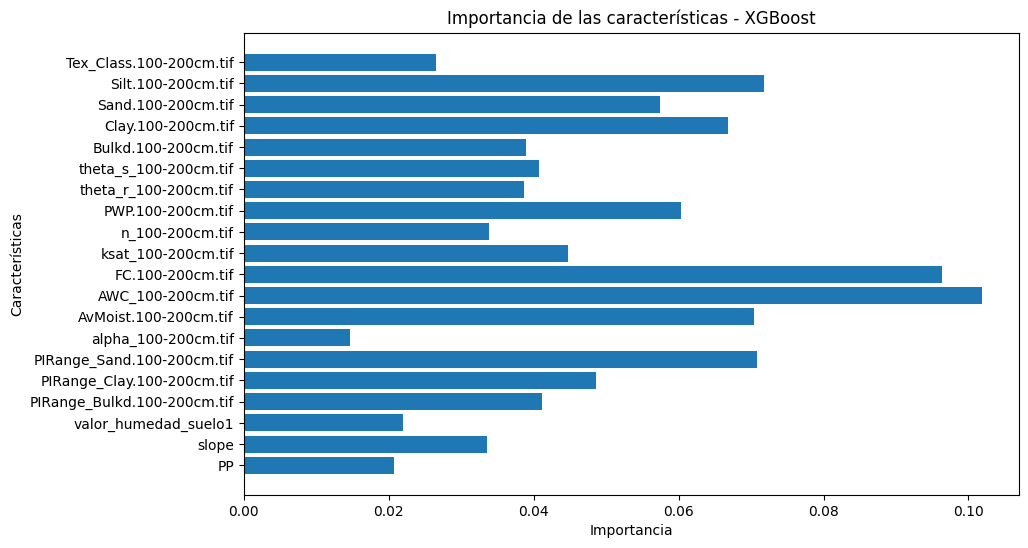

In [188]:
feature_importance = best_model.feature_importances_

# Obtener nombres de las características
feature_names = data.columns

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características - XGBoost')
plt.show()

In [189]:
data_0_final = data_0_final.drop(columns='Valor')
data_1_final = data_1_final.drop(columns='Valor')

In [190]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class PUBagging:
    def __init__(self, num_iterations=10, sample_ratio=1.0, random_state=42):
        self.num_iterations = num_iterations
        self.sample_ratio = sample_ratio
        self.random_state = random_state
        self.classifiers = []
        self.probabilities = None

    def fit(self, landslide_samples, unlabeled_samples):
        np.random.seed(self.random_state)

        if isinstance(landslide_samples, np.ndarray):
            landslide_samples_array = landslide_samples
        else:
            landslide_samples_array = landslide_samples.values  # Convert to numpy array if it's a DataFrame

        if isinstance(unlabeled_samples, np.ndarray):
            unlabeled_samples_array = unlabeled_samples
        else:
            unlabeled_samples_array = unlabeled_samples.values  # Convert to numpy array if it's a DataFrame

        num_samples = len(landslide_samples_array)
        num_unlabeled = len(unlabeled_samples_array)

        for _ in range(self.num_iterations):
            # Step 1: Sample equal number of unlabeled samples as non-landslide samples
            non_landslide_indices = np.random.choice(num_unlabeled, size=int(num_samples * self.sample_ratio), replace=False)
            non_landslide_samples = unlabeled_samples_array[non_landslide_indices]

            # Combine with landslide samples to form training set
            X_train = np.vstack((landslide_samples_array, non_landslide_samples))
            y_train = np.hstack((np.ones(num_samples), np.zeros(len(non_landslide_samples))))

            # Step 2: Train decision tree classifier
            clf = DecisionTreeClassifier(random_state=self.random_state)
            clf.fit(X_train, y_train)
            self.classifiers.append(clf)

            # Step 3: Predict probability of being landslide for unlabeled samples
            prob_landslide = clf.predict_proba(unlabeled_samples_array)[:, 1]

            if self.probabilities is None:
                self.probabilities = prob_landslide
            else:
                self.probabilities += prob_landslide

        # Step 4: Average probabilities over iterations
        self.probabilities /= self.num_iterations

    def predict_proba(self, unlabeled_samples):
        if isinstance(unlabeled_samples, np.ndarray):
            return self.probabilities
        else:
            return self.probabilities[:len(unlabeled_samples)]  # Return probabilities for original DataFrame

# Example usage:
if __name__ == '__main__':
    import pandas as pd
    
    # Example data (replace with your own data)
    landslide_samples = data_1_final  # Example landslide samples as DataFrame
    unlabeled_samples = data_0_final# Example unlabeled samples as DataFrame

    # Create PU Bagging instance
    pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.4, random_state=42)

    # Fit the model
    pu_bagging.fit(landslide_samples, unlabeled_samples)

    # Predict probabilities for unlabeled samples
    probabilities = pu_bagging.predict_proba(unlabeled_samples)
    print("Predicted probabilities:", probabilities)


Predicted probabilities: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.52090562 0.75988867
 0.55988867 0.55988867 0.         0.         0.42090562 0.
 0.         0.82090562 0.62090562 0.         0.71138181 0.48757229
 0.72911944 0.         0.62090562 0.         0.68840562 0.63988867
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.80423896 0.42090562
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.80423896 0.77346972 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.82090562 0.         0.         0.         0.

In [191]:
# Suponiendo que ya tienes las probabilidades predichas por pu_bagging.predict_proba(unlabeled_samples)

# Umbral para seleccionar muestras no deslizamiento
threshold = 0.5  # Puedes ajustar este umbral según tus necesidades

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)


Muestras no deslizamiento seleccionadas:
              PP      slope  valor_humedad_suelo1  \
0      11.358299  37.616885              0.460907   
2     282.989359  37.616885              0.467758   
4      88.743122  57.405164              0.436966   
6     101.366892  37.844912              0.515045   
8       0.000000  42.977906              0.478531   
...          ...        ...                   ...   
996     3.830269  48.232759              0.471466   
997     6.876428  36.674431                   NaN   
998   327.677736  48.232759              0.471588   
999   327.677736  48.232759              0.471588   
1000  329.135137  36.674431                   NaN   

      PIRange_Bulkd.100-200cm.tif  PIRange_Clay.100-200cm.tif  \
0                           0.766                   45.120998   
2                           0.766                   45.120998   
4                           0.692                   35.014999   
6                           0.726                   32.932999 

In [192]:
selected_non_landslide_samples['Valor'] = 0
data_1_final['Valor'] = 1

data = pd.concat([data_1_final, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

C:\Users\ivo\AppData\Local\Temp\ipykernel_9960\2898638951.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
data.shape, data_y.shape

((899, 20), (899,))

In [194]:
data_1_final.shape, selected_non_landslide_samples.shape

((458, 21), (441, 21))

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
}

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2)
print(f'Numero de entrenamiendo: {X_train.shape}, Numero de test: {X_test.shape}')
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precisión de {acc*100}')


Numero de entrenamiendo: (719, 20), Numero de test: (180, 20)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión de 85.0


In [196]:
data = data.fillna(data.mean())

In [197]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [198]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

n_digits = 3

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=data_y)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=data_y)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=data_y)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.050s	11843	0.040	0.030	0.034	0.019	0.033	0.145
random   	0.027s	11843	0.040	0.030	0.034	0.019	0.033	0.169
PCA-based	0.011s	12185	0.057	0.038	0.045	0.053	0.044	0.166
__________________________________________________________________________________


IndexError: list index out of range

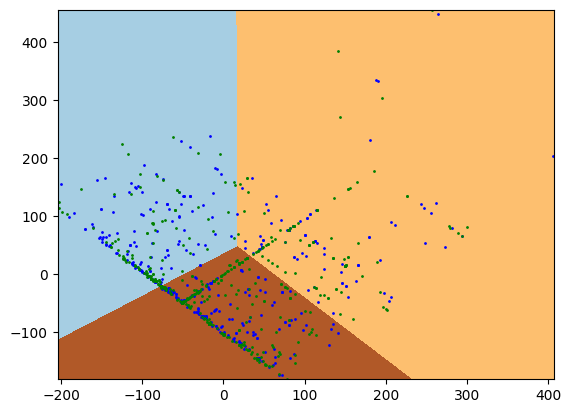

In [199]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_train and y_train are already defined

# Perform PCA
reduced_data = PCA(n_components=2).fit_transform(data)

# Fit KMeans clustering
n_digits = 3  # Assuming you want 2 clusters
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot points colored by y_train labels
colors = ['blue', 'green']  # Color for y_train = 0 and y_train = 1
for i in range(n_digits):
    plt.plot(reduced_data[data_y == i, 0], reduced_data[data_y == i, 1], '.', markersize=2, color=colors[i], label=f'y_train = {i}')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()


In [200]:
data = (data - data.mean()) / data.std()

In [201]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(data, data_y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True,)
array_booleanos = model.get_support()
array_booleanos[0] = True
#X_new = model.transform(data)
X_new = data[data.columns[array_booleanos]]
X_new.shape

(899, 10)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_new, data_y, test_size=0.2)
print(f'Numero de entrenamiendo: {X_train.shape}, Numero de test: {X_test.shape}')
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precisión de {acc*100}')

Numero de entrenamiendo: (719, 10), Numero de test: (180, 10)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión de 80.0


In [203]:
X_new = X_new.drop(columns='theta_s_100-200cm.tif')

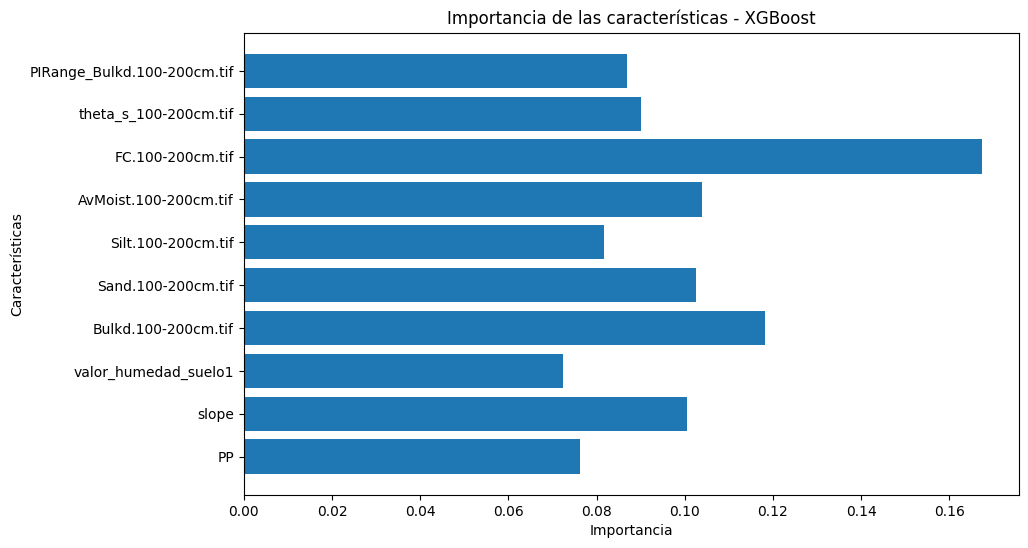

In [204]:
feature_importance = best_model.feature_importances_

# Obtener nombres de las características
feature_names = X_train.columns

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características - XGBoost')
plt.show()


In [205]:
X_train = X_train.fillna(X_train.mean())

In [206]:
import hdbscan
df = pd.DataFrame()
#X_new, data_y
df = X_new
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['cluster'] = clusterer.fit_predict(X_scaled)

In [207]:
import plotly.express as px
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Crear gráfico interactivo
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=df['cluster'].astype(str),
    title='Clusterización con HDBSCAN y PCA',
    labels={'x': 'Componente 1', 'y': 'Componente 2', 'z': 'Componente 3', 'color': 'Cluster ID'}
)

fig.show()

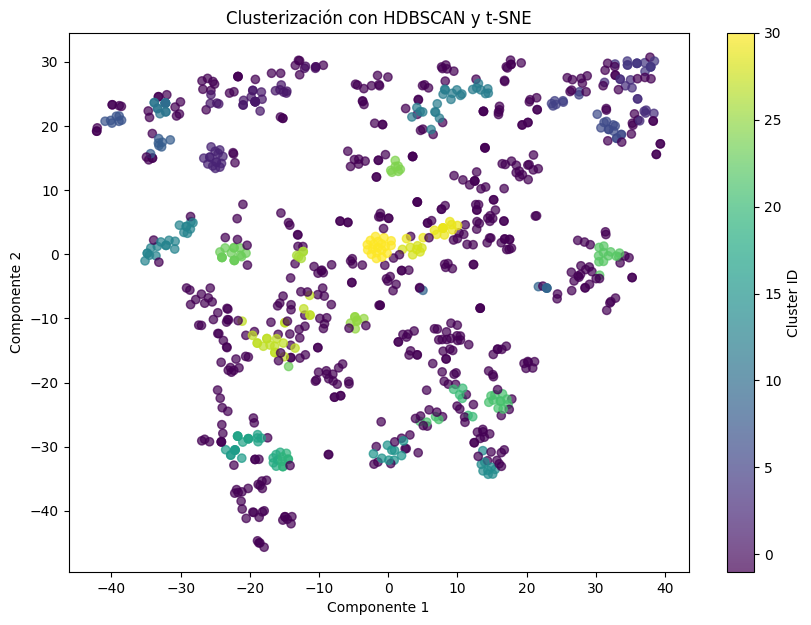

In [208]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear gráfico
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.colorbar(scatter, label='Cluster ID')
plt.title('Clusterización con HDBSCAN y t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


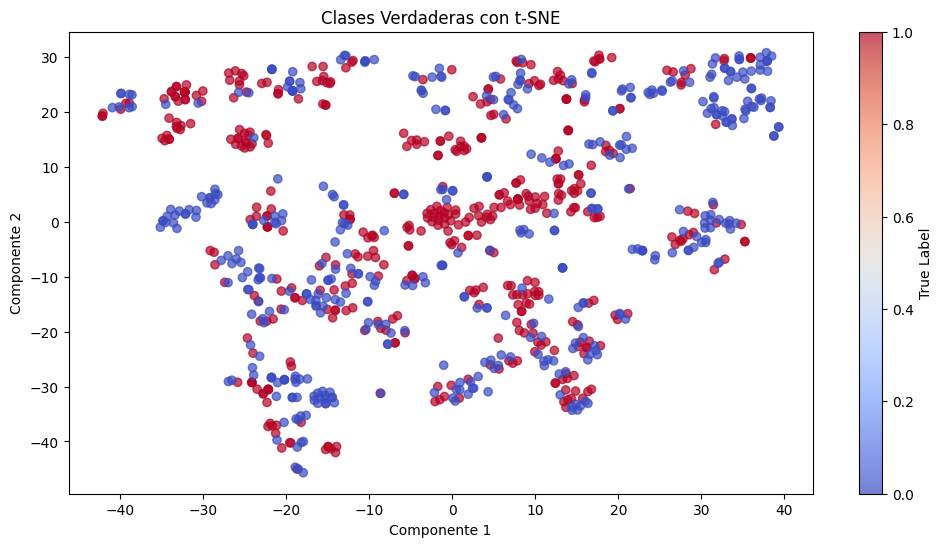

In [209]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_y, cmap='coolwarm', marker='o', alpha=0.7, label='True Labels')
plt.colorbar(scatter, label='True Label')
plt.title('Clases Verdaderas con t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()

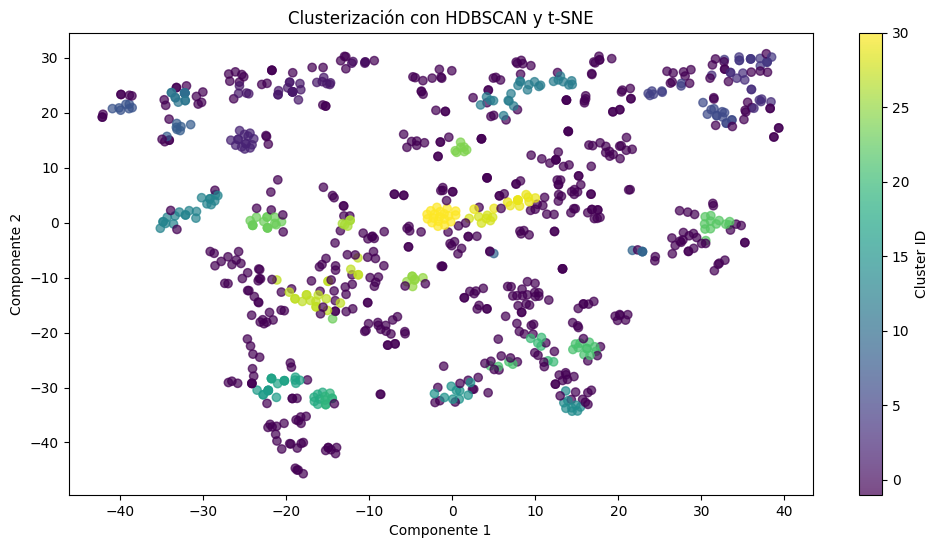

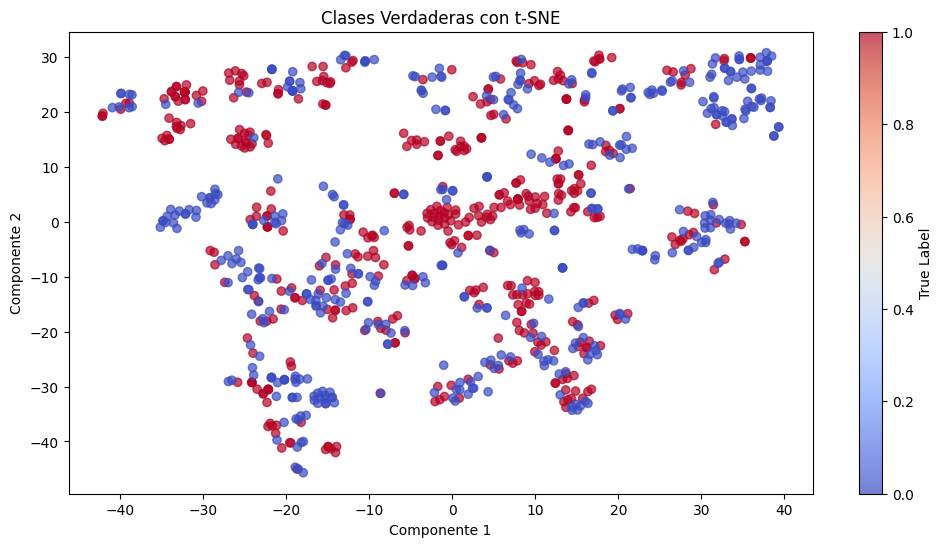

In [210]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear gráfico
plt.figure(figsize=(12, 6))

# Graficar clusters
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['cluster'], cmap='viridis', marker='o', alpha=0.7, label='Clusters')
plt.colorbar(scatter, label='Cluster ID')
plt.title('Clusterización con HDBSCAN y t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Graficar clases verdaderas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_y, cmap='coolwarm', marker='o', alpha=0.7, label='True Labels')
plt.colorbar(scatter, label='True Label')
plt.title('Clases Verdaderas con t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()

In [211]:
from sklearn.metrics import confusion_matrix, classification_report
df['label'] = data_y
# Asignar clusters a clases
df['predicted_label'] = df['cluster'].map(df.groupby('cluster')['label'].agg(lambda x: x.mode()[0]))

# Evaluar la precisión de clustering
print(confusion_matrix(df['label'], df['predicted_label']))
print(classification_report(df['label'], df['predicted_label']))


[[174 267]
 [ 61 397]]
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       441
           1       0.60      0.87      0.71       458

    accuracy                           0.64       899
   macro avg       0.67      0.63      0.61       899
weighted avg       0.67      0.64      0.61       899



In [224]:
X_new = X_new.drop(columns=['cluster', 'label', 'predicted_label'])

In [237]:
X_new = (X_new - X_new.mean()) / X_new.std()

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_new, data_y, test_size=0.2)

In [239]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=5)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('selectkbest', SelectKBest(k=5)), ('linearsvc', LinearSVC())])

In [240]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63        83
           1       0.68      0.72      0.70        97

    accuracy                           0.67       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.67      0.67      0.67       180



In [241]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 7


In [242]:
cv_results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.600777,0.048541,0.638889,0.527778,0.625000,0.652778,0.559441
1,0.602117,0.058371,0.645833,0.548611,0.611111,0.680556,0.524476
2,0.610606,0.049418,0.625000,0.541667,0.569444,0.680556,0.636364
3,0.620299,0.053758,0.638889,0.527778,0.625000,0.694444,0.615385
4,0.613345,0.042767,0.638889,0.562500,0.576389,0.680556,0.608392
5,0.618891,0.032077,0.645833,0.618056,0.569444,0.659722,0.601399
6,0.636995,0.020778,0.673611,0.638889,0.611111,0.625000,0.636364
7,0.660703,0.039145,0.708333,0.618056,0.645833,0.625000,0.706294
8,0.663481,0.033088,0.687500,0.625000,0.673611,0.625000,0.706294


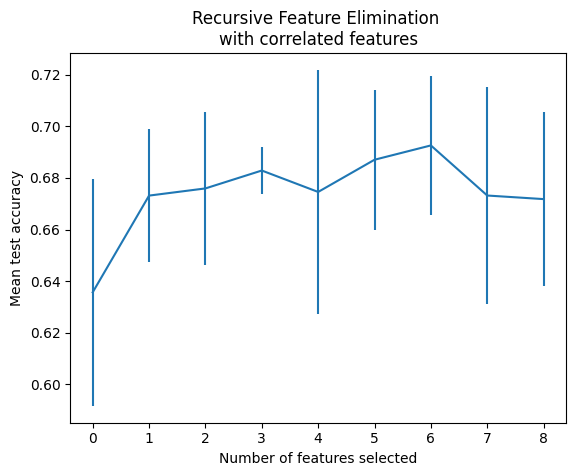

In [243]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=[0,1,2,3,4,5,6,7,8],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [244]:
selected_features = np.where(rfecv.support_)[0]
print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: [1 2 3 4 5 6 7]


In [236]:
X_train

,PP,slope,valor_humedad_suelo1,Bulkd.100-200cm.tif,Sand.100-200cm.tif,Silt.100-200cm.tif,AvMoist.100-200cm.tif,FC.100-200cm.tif,PIRange_Bulkd.100-200cm.tif
387,-0.750184,0.494267,-8.496479e-17,1.610823,0.726316,-1.580447,-1.692055,-1.282262,-0.743218
750,0.078215,0.734751,1.155276e-01,-1.447073,-0.642058,1.375662,2.214269,1.605897,-0.532363
411,-0.496399,0.479875,1.994603e+00,1.187337,-1.504281,1.165348,-0.235460,0.109114,-0.626076
297,-0.772726,-0.829887,-4.333250e-01,0.582358,0.407109,-1.432512,-0.864444,-0.186027,0.240772
705,4.163823,1.783857,1.432333e-01,-0.462606,0.423960,0.354076,0.062480,-0.607655,-0.368364
...,...,...,...,...,...,...,...,...,...
459,0.346561,-0.929630,1.432333e-01,0.125873,-0.273054,-0.838265,-0.301669,0.657232,0.662482
121,-0.739589,-0.046945,-5.648393e-01,-0.407608,0.958035,-1.545902,-0.301669,0.404254,-0.836931
5,-0.710516,-1.572039,1.014994e-01,-0.765096,0.610697,-0.432227,0.161793,0.066951,0.639054
603,0.649125,-0.526027,-8.496479e-17,-1.364576,-0.082947,0.504428,1.386658,1.205350,-1.141499
